## Análise do Desempenho dos Sensores IoT que Monitoram Bombas e Compressores em Plataformas Offshore – Simulação Petrobras

### Código para carregar e explorar o Parquet

In [1]:
import pandas as pd

# Caminho para o arquivo
caminho_parquet = "../data/lake/sensores_lake.parquet"

# Carregando o DataFrame
df = pd.read_parquet(caminho_parquet)

# Visualizando as primeiras linhas
df.head()


,plataforma,equipamento,tipo_sensor,valor,unidade,timestamp
0,Plataforma A,SensorBox 3,temperatura,83.45,C,2025-03-21 20:20:50.280626+00:00
1,Plataforma A,SensorBox 3,umidade,69.18,%,2025-03-21 20:20:50.280626+00:00
2,Plataforma A,SensorBox 3,pressao,52.44,Pa,2025-03-21 20:20:50.280626+00:00
3,Plataforma C,SensorBox 3,temperatura,61.95,C,2025-03-21 20:20:50.280626+00:00
4,Plataforma C,SensorBox 3,umidade,26.11,%,2025-03-21 20:20:50.280626+00:00


### Exemplos de análise que você pode fazer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   plataforma   150 non-null    object 
 1   equipamento  150 non-null    object 
 2   tipo_sensor  150 non-null    object 
 3   valor        150 non-null    float64
 4   unidade      150 non-null    object 
 5   timestamp    150 non-null    object 
dtypes: float64(1), object(5)
memory usage: 7.2+ KB


<Axes: title={'center': 'Temperatura ao longo do tempo'}, xlabel='timestamp'>

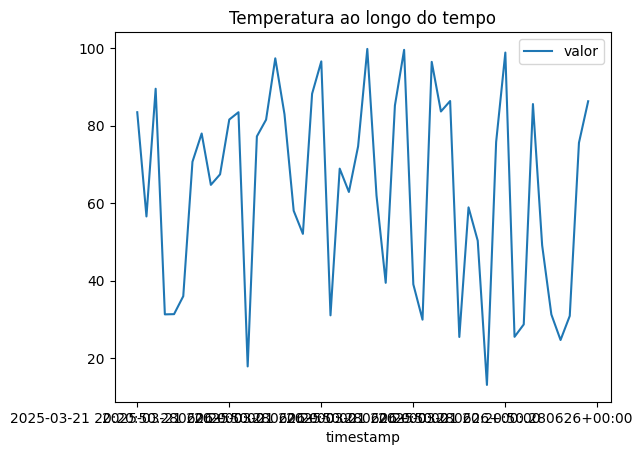

In [3]:
# Ver as colunas e tipos
df.info()

# Estatísticas básicas
df.describe()

# Contagem por tipo de sensor
df['tipo_sensor'].value_counts()

# Evolução do valor de um sensor ao longo do tempo
df[df['tipo_sensor'] == 'temperatura'].sort_values('timestamp').plot(x='timestamp', y='valor', title='Temperatura ao longo do tempo')


### Distribuição de Valores por Tipo de Sensor

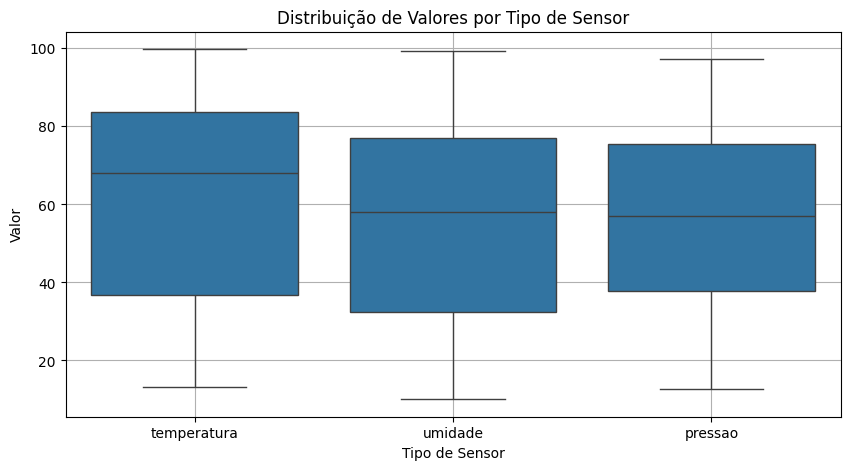

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='tipo_sensor', y='valor')
plt.title('Distribuição de Valores por Tipo de Sensor')
plt.xlabel('Tipo de Sensor')
plt.ylabel('Valor')
plt.grid(True)
plt.show()


### Média de Valores por Equipamento e Tipo de Sensor

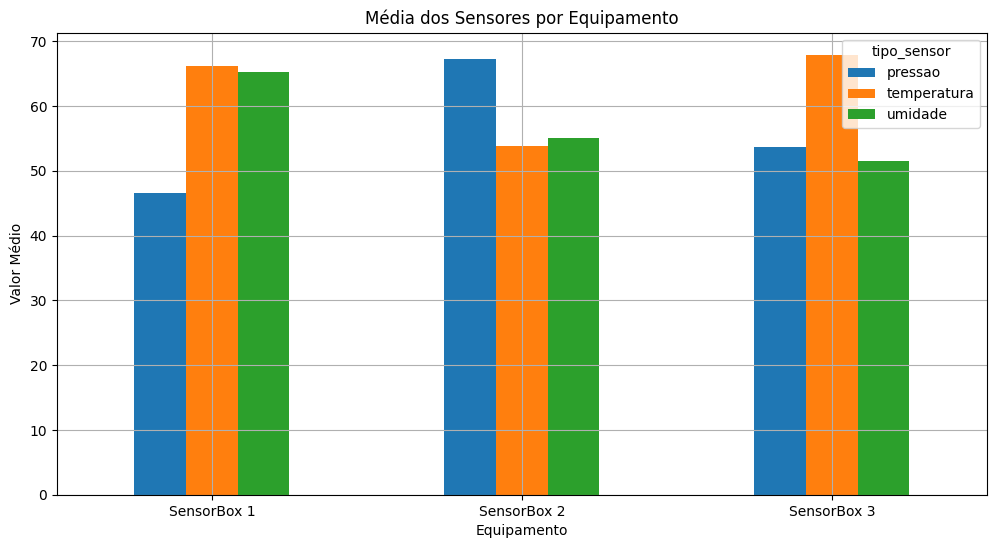

In [7]:
media_equip = df.groupby(['equipamento', 'tipo_sensor'])['valor'].mean().unstack()

media_equip.plot(kind='bar', figsize=(12, 6))
plt.title('Média dos Sensores por Equipamento')
plt.xlabel('Equipamento')
plt.ylabel('Valor Médio')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


### Evolução Temporal para Cada Tipo de Sensor (Linhas Separadas)

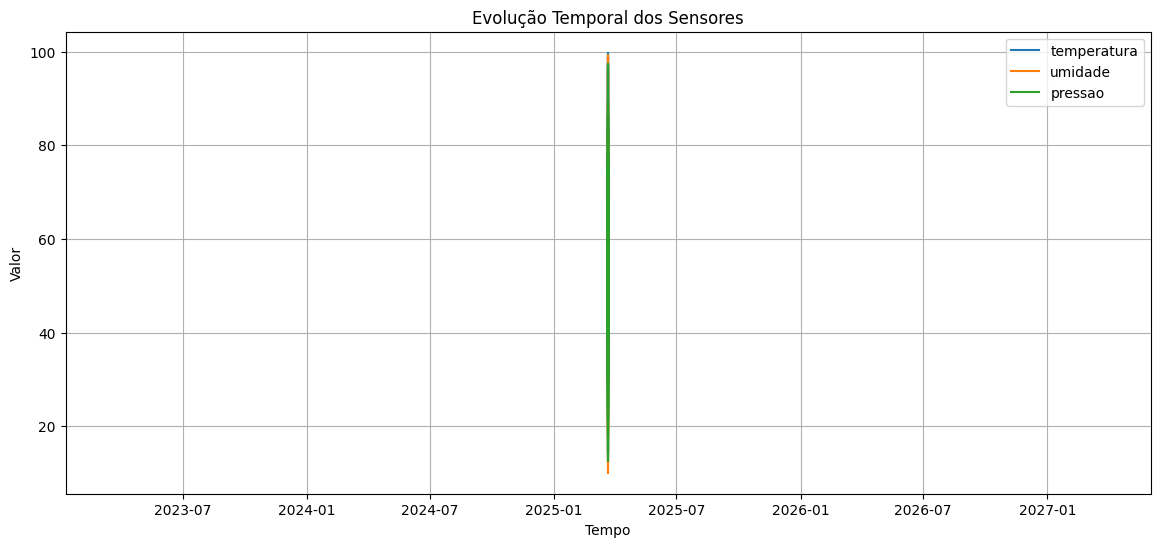

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

plt.figure(figsize=(14, 6))
for sensor in df['tipo_sensor'].unique():
    dados_sensor = df[df['tipo_sensor'] == sensor]
    plt.plot(dados_sensor['timestamp'], dados_sensor['valor'], label=sensor)

plt.title('Evolução Temporal dos Sensores')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


### Contagem de Leituras por Plataforma

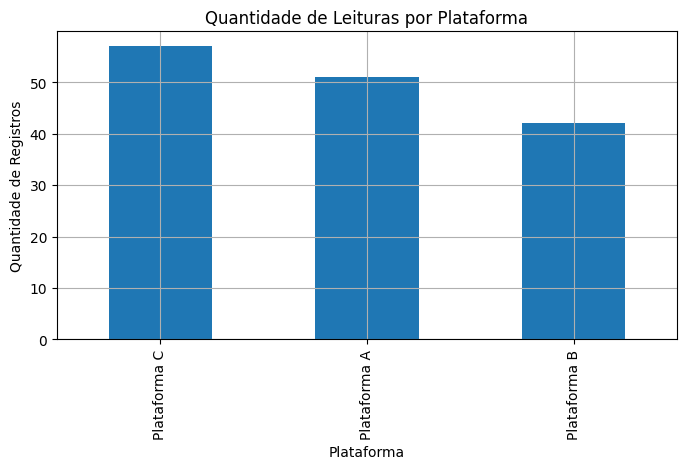

In [9]:
plt.figure(figsize=(8, 4))
df['plataforma'].value_counts().plot(kind='bar')
plt.title('Quantidade de Leituras por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Quantidade de Registros')
plt.grid(True)
plt.show()


### Mapa de Calor das Correlações (se houver mais variáveis numéricas)

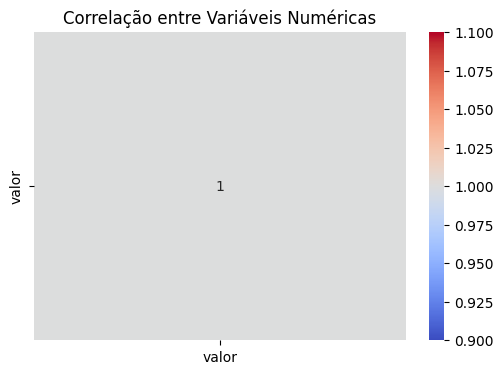

In [10]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()
